In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [199]:
data=pd.read_csv(r'C:\Users\Tunzale\Desktop\DSDS\22\interest_prediction_bank.csv')
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [200]:
pd.set_option('display.max_columns',40)
data.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_interested
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,NNVBBKZB,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [201]:
data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_interested           int64
dtype: object

In [202]:
cat = (data.dtypes == 'object')
categorical_cols = list(cat[cat].index)

categorical_cols

['ID',
 'Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [203]:
num=(data.dtypes=='int64')
numerical_cols=list(num[num].index)
numerical_cols

['Age', 'Vintage', 'Avg_Account_Balance', 'Is_interested']

In [204]:
data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_interested              0
dtype: int64

In [205]:
data['Credit_Product'].fillna(data['Credit_Product'].mode()[0],inplace=True)

In [206]:
data.corr()['Is_interested']

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_11120\440763973.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Is_interested']


Age                    0.230814
Vintage                0.279642
Avg_Account_Balance    0.053370
Is_interested          1.000000
Name: Is_interested, dtype: float64

In [207]:
data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_interested'],
      dtype='object')

In [208]:
for i in data[['ID', 'Region_Code', 'Avg_Account_Balance']]:
    data.drop(i,axis=1,inplace=True)

In [209]:
data.isnull().sum()

Gender            0
Age               0
Occupation        0
Channel_Code      0
Vintage           0
Credit_Product    0
Is_Active         0
Is_interested     0
dtype: int64

In [210]:
data.dtypes

Gender            object
Age                int64
Occupation        object
Channel_Code      object
Vintage            int64
Credit_Product    object
Is_Active         object
Is_interested      int64
dtype: object

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Age','Vintage']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,5.01699,Age
1,5.01699,Vintage


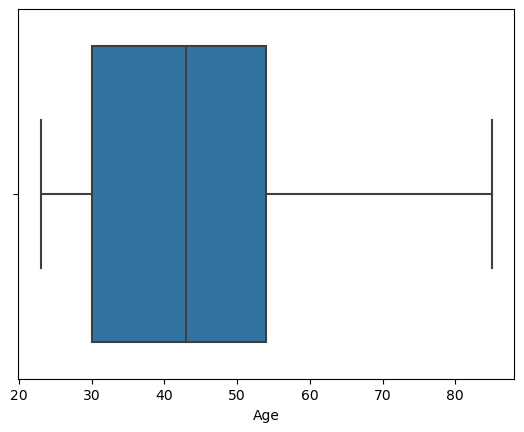

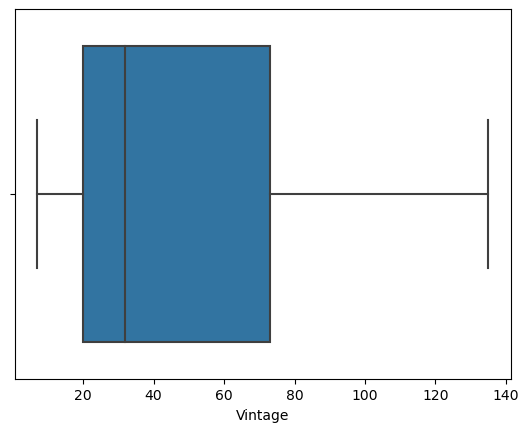

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in data[['Age','Vintage']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [213]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Is_Active', 'Is_interested'],
      dtype='object')

In [214]:
data

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Is_interested
0,Female,73,Other,X3,43,No,No,0
1,Female,30,Salaried,X1,32,No,No,0
2,Female,56,Self_Employed,X3,26,No,Yes,0
3,Male,34,Salaried,X1,19,No,No,0
4,Female,30,Salaried,X1,33,No,No,0
...,...,...,...,...,...,...,...,...
245720,Male,51,Self_Employed,X3,109,No,No,0
245721,Male,27,Salaried,X1,15,No,Yes,0
245722,Female,26,Salaried,X1,13,No,No,0
245723,Female,28,Salaried,X1,31,No,No,0


In [215]:
inputs = data[['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Is_Active']]
output = data['Is_interested']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [217]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)


In [218]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [219]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [220]:
pip install catboost

In [221]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [222]:
data.dtypes

Gender            object
Age                int64
Occupation        object
Channel_Code      object
Vintage            int64
Credit_Product    object
Is_Active         object
Is_interested      int64
dtype: object

In [223]:
catboost_model = CatBoostClassifier(cat_features=['Gender', 'Credit_Product','Occupation', 'Channel_Code', 'Is_Active'])

In [224]:
catboost_model.fit(X_train, y_train)

Learning rate set to 0.092792
0:	learn: 0.6449618	total: 114ms	remaining: 1m 54s
1:	learn: 0.6068370	total: 221ms	remaining: 1m 50s
2:	learn: 0.5778296	total: 309ms	remaining: 1m 42s
3:	learn: 0.5543222	total: 403ms	remaining: 1m 40s
4:	learn: 0.5350290	total: 497ms	remaining: 1m 38s
5:	learn: 0.5196368	total: 572ms	remaining: 1m 34s
6:	learn: 0.5082920	total: 647ms	remaining: 1m 31s
7:	learn: 0.4963675	total: 742ms	remaining: 1m 32s
8:	learn: 0.4872707	total: 822ms	remaining: 1m 30s
9:	learn: 0.4802799	total: 903ms	remaining: 1m 29s
10:	learn: 0.4750736	total: 974ms	remaining: 1m 27s
11:	learn: 0.4698383	total: 1.06s	remaining: 1m 27s
12:	learn: 0.4659250	total: 1.14s	remaining: 1m 26s
13:	learn: 0.4629451	total: 1.22s	remaining: 1m 25s
14:	learn: 0.4603643	total: 1.31s	remaining: 1m 26s
15:	learn: 0.4582515	total: 1.4s	remaining: 1m 26s
16:	learn: 0.4565600	total: 1.5s	remaining: 1m 26s
17:	learn: 0.4551773	total: 1.59s	remaining: 1m 26s
18:	learn: 0.4537443	total: 1.68s	remaining: 1

In [225]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_catboost = evaluate(catboost_model, X_test, y_test)

Model Performance
Gini prob is 57.18816307378021
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     56260
           1       0.64      0.28      0.39     17458

    accuracy                           0.79     73718
   macro avg       0.73      0.62      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53547  2713]
 [12567  4891]]


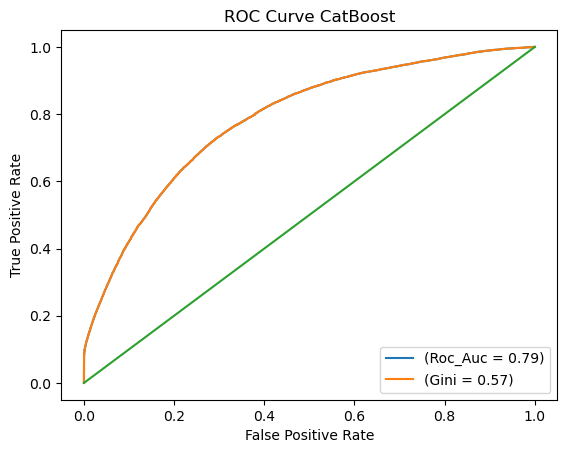

In [226]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = catboost_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

In [238]:
lgb_clf = XGBClassifier()
lgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [239]:
inputs = data[['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Is_Active']]
output = data['Is_interested']

In [240]:
new_data = data.copy()

In [241]:
new_data.describe(include='all')

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Is_Active,Is_interested
count,245725,245725.000000,245725,245725,245725.000000,245725,245725,245725.000000
unique,2,NaN,4,4,NaN,2,2,NaN
top,Male,NaN,Self_Employed,X1,NaN,No,No,NaN
freq,134197,NaN,100886,103718,NaN,173682,150290,NaN
mean,NaN,43.856307,NaN,NaN,46.959141,NaN,NaN,0.237208
std,NaN,14.828672,NaN,NaN,32.353136,NaN,NaN,0.425372
min,NaN,23.000000,NaN,NaN,7.000000,NaN,NaN,0.000000
25%,NaN,30.000000,NaN,NaN,20.000000,NaN,NaN,0.000000
50%,NaN,43.000000,NaN,NaN,32.000000,NaN,NaN,0.000000
75%,NaN,54.000000,NaN,NaN,73.000000,NaN,NaN,0.000000


In [242]:
new_data = pd.get_dummies(new_data, drop_first=True)

In [243]:
new_data.columns


Index(['Age', 'Vintage', 'Is_interested', 'Gender_Male', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X2',
       'Channel_Code_X3', 'Channel_Code_X4', 'Credit_Product_Yes',
       'Is_Active_Yes'],
      dtype='object')

In [244]:
inputs = new_data.drop('Is_interested', axis=1)
output = new_data['Is_interested']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [247]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [248]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_lgb = evaluate(xgb_clf, X_test, y_test)

Model Performance
Gini prob is 56.78981951177775
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     56260
           1       0.64      0.28      0.39     17458

    accuracy                           0.79     73718
   macro avg       0.72      0.62      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53463  2797]
 [12555  4903]]


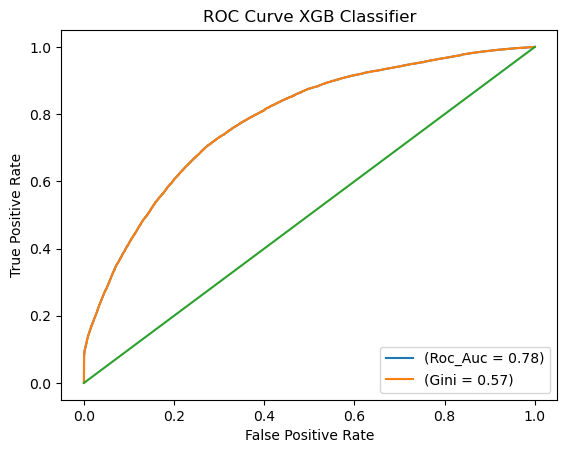

In [249]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = xgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()

In [250]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 40830, number of negative: 131177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 172007, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237374 -> initscore=-1.167130
[LightGBM] [Info] Start training from score -1.167130


LGBMClassifier()

In [251]:
result_lgb = evaluate(lgb_clf, X_test, y_test)

Model Performance
Gini prob is 57.31059046307148
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     56260
           1       0.66      0.26      0.37     17458

    accuracy                           0.79     73718
   macro avg       0.73      0.61      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53925  2335]
 [12904  4554]]


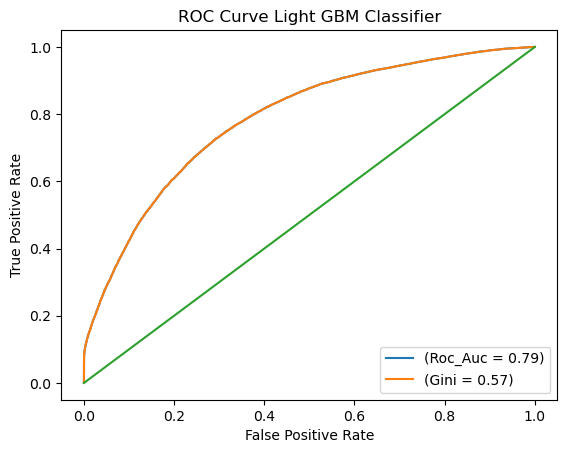

In [252]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = lgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Light GBM Classifier')

plt.legend(loc='lower right')
plt.show()

In [253]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train,y_train)

Learning rate set to 0.092792
0:	learn: 0.6458081	total: 41.2ms	remaining: 41.2s
1:	learn: 0.6067509	total: 66ms	remaining: 33s
2:	learn: 0.5779688	total: 87.1ms	remaining: 28.9s
3:	learn: 0.5534294	total: 107ms	remaining: 26.6s
4:	learn: 0.5330984	total: 127ms	remaining: 25.2s
5:	learn: 0.5177941	total: 145ms	remaining: 24.1s
6:	learn: 0.5062090	total: 162ms	remaining: 23s
7:	learn: 0.4956847	total: 180ms	remaining: 22.3s
8:	learn: 0.4879388	total: 198ms	remaining: 21.8s
9:	learn: 0.4814853	total: 220ms	remaining: 21.8s
10:	learn: 0.4763140	total: 238ms	remaining: 21.4s
11:	learn: 0.4717211	total: 254ms	remaining: 20.9s
12:	learn: 0.4677016	total: 271ms	remaining: 20.6s
13:	learn: 0.4652479	total: 289ms	remaining: 20.3s
14:	learn: 0.4625046	total: 309ms	remaining: 20.3s
15:	learn: 0.4602252	total: 326ms	remaining: 20s
16:	learn: 0.4582934	total: 345ms	remaining: 19.9s
17:	learn: 0.4565479	total: 364ms	remaining: 19.8s
18:	learn: 0.4549421	total: 382ms	remaining: 19.7s
19:	learn: 0.453

In [254]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 10],
    'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

param_distributions

{'n_estimators': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'max_depth': [3, 5, 7, 10],
 'num_leaves': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [255]:
random_search_lgb = RandomizedSearchCV(lgb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 40830, number of negative: 131177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 172007, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237374 -> initscore=-1.167130
[LightGBM] [Info] Start training from score -1.167130


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=1, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [10, 50, 100, 500,
                                                         1000],
                                        'num_leaves': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100]},
                   random_state=42)

In [261]:
print("Best Hyperparameters for LGBM: ", random_search_lgb.best_params_)

Best Hyperparameters for LGBM:  {'num_leaves': 30, 'n_estimators': 10, 'max_depth': 7, 'learning_rate': 0.01}


In [263]:
optimized_model_xgb = random_search_lgb.best_estimator_
optmized_accuracy_xgb = evaluate(optimized_model_xgb, X_test, y_test)


Model Performance
Gini prob is 53.340326977219064
              precision    recall  f1-score   support

           0       0.76      1.00      0.87     56260
           1       0.00      0.00      0.00     17458

    accuracy                           0.76     73718
   macro avg       0.38      0.50      0.43     73718
weighted avg       0.58      0.76      0.66     73718

[[56260     0]
 [17458     0]]


C:\Users\Tunzale\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tunzale\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tunzale\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [265]:
param_distributions = {
    'iterations': [10, 50, 100, 500, 1000], 
 
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7), 
}

param_distributions

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [266]:
random_search_cb = RandomizedSearchCV(cb_clf,
                                   param_distributions=param_distributions,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb.fit(X_train, y_train)

0:	learn: 0.6879837	total: 19.6ms	remaining: 19.6s
1:	learn: 0.6829228	total: 34.9ms	remaining: 17.4s
2:	learn: 0.6778974	total: 50.8ms	remaining: 16.9s
3:	learn: 0.6731076	total: 66.6ms	remaining: 16.6s
4:	learn: 0.6685031	total: 81.2ms	remaining: 16.2s
5:	learn: 0.6638921	total: 96.2ms	remaining: 15.9s
6:	learn: 0.6594422	total: 113ms	remaining: 16.1s
7:	learn: 0.6550622	total: 128ms	remaining: 15.9s
8:	learn: 0.6507098	total: 142ms	remaining: 15.7s
9:	learn: 0.6464824	total: 156ms	remaining: 15.4s
10:	learn: 0.6423871	total: 170ms	remaining: 15.3s
11:	learn: 0.6383416	total: 184ms	remaining: 15.2s
12:	learn: 0.6344473	total: 198ms	remaining: 15.1s
13:	learn: 0.6306505	total: 212ms	remaining: 14.9s
14:	learn: 0.6269705	total: 225ms	remaining: 14.8s
15:	learn: 0.6233231	total: 244ms	remaining: 15s
16:	learn: 0.6197618	total: 264ms	remaining: 15.3s
17:	learn: 0.6162847	total: 277ms	remaining: 15.1s
18:	learn: 0.6129171	total: 293ms	remaining: 15.1s
19:	learn: 0.6095883	total: 307ms	rem

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000017F3CD2D0D0>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [267]:
print("Best Hyperparameters for CB: ", random_search_cb.best_params_)

Best Hyperparameters for CB:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [268]:
optimized_model_cb = random_search_cb.best_estimator_
optmized_accuracy_cb = evaluate(optimized_model_cb, X_test, y_test)

Model Performance
Gini prob is 55.44664932876127
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     56260
           1       0.69      0.19      0.30     17458

    accuracy                           0.79     73718
   macro avg       0.74      0.58      0.59     73718
weighted avg       0.77      0.79      0.74     73718

[[54740  1520]
 [14058  3400]]


In [269]:
pip install --upgrade mlxtend

                                              0.0/1.4 MB ? eta -:--:--
     -                                        0.0/1.4 MB ? eta -:--:--
     -                                        0.0/1.4 MB ? eta -:--:--
     -                                        0.1/1.4 MB 491.5 kB/s eta 0:00:03
     -                                        0.1/1.4 MB 491.5 kB/s eta 0:00:03
     -                                        0.1/1.4 MB 491.5 kB/s eta 0:00:03
     -                                        0.1/1.4 MB 491.5 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 379.3 kB/s eta 0:00:04
     ---                                      0.1/1.4 MB 379.3 kB/s eta 0:00:04
     ---                                      0.1/1.4 MB 379.3 kB/s eta 0:00:04
     ---                                      0.1/1.4 MB 327.9 kB/s eta 0:00:04
     ----                                     0.2/1.4 MB 296.2 kB/s eta 0:00:05
     ----                                     0.2/1.4 MB 296.2 kB/s

In [270]:
from mlxtend.classifier import StackingCVClassifier

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [271]:
base_classifiers = [
    LGBMClassifier(),
    XGBClassifier()
]

In [272]:
meta_classifier = CatBoostClassifier()

In [275]:
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [276]:
stacking_classifier.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
[LightGBM] [Info] Number of positive: 32664, number of negative: 104941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 137605, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237375 -> initscore=-1.167125
[LightGBM] [Info] Start training from score -1.167125


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LightGBM] [Info] Number of positive: 32664, number of negative: 104941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 137605, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237375 -> initscore=-1.167125
[LightGBM] [Info] Start training from score -1.167125
[LightGBM] [Info] Number of positive: 32664, number of negative: 104942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 137606, number of used features: 11
[LightGBM] [Info

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting classifier2: xgbclassifier (2/2)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


[LightGBM] [Info] Number of positive: 40830, number of negative: 131177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 172007, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237374 -> initscore=-1.167130
[LightGBM] [Info] Start training from score -1.167130
Learning rate set to 0.092792
0:	learn: 0.6399988	total: 29.3ms	remaining: 29.3s
1:	learn: 0.5980250	total: 58.6ms	remaining: 29.2s
2:	learn: 0.5656097	total: 84ms	remaining: 27.9s
3:	learn: 0.5400521	total: 111ms	remaining: 27.6s
4:	learn: 0.5197573	total: 129ms	remaining: 25.8s
5:	learn: 0.5040825	total: 153ms	remaining: 25.3s
6:	learn: 0.4911537	total: 175ms	remaining: 24.8s
7:	learn: 0.4820330	total: 195ms	remaining: 24.2s
8:	learn: 

StackingCVClassifier(classifiers=[LGBMClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=N...
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x0000017F3CFAFBD0>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [277]:
result_stacking = evaluate(stacking_classifier, X_test, y_test)

Model Performance
Gini prob is 56.54190187474264
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     56260
           1       0.63      0.27      0.38     17458

    accuracy                           0.79     73718
   macro avg       0.72      0.61      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53522  2738]
 [12698  4760]]


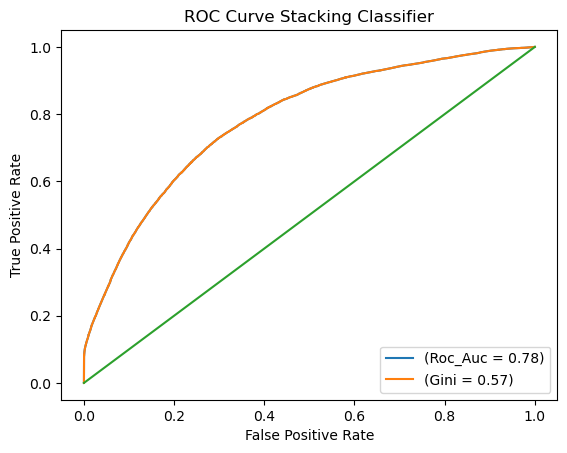

In [278]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()

In [282]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Create lists to store the variables, ROC AUC scores, and Gini scores
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    # Fit a classifier using the single variable on the training set
    lgb_clf.fit(X_train_single_var, y_train)
    y_pred_train_single_var = lgb_clf.predict_proba(X_train_single_var)[:, 1]

    # Calculate ROC AUC score for the single variable model on the training set
    train_roc = roc_auc_score(y_train, y_pred_train_single_var)

    # Calculate Gini score for the single variable model on the training set
    train_gini = 2 * train_roc - 1

    # Fit a classifier using the single variable on the test set
    y_pred_test_single_var = lgb_clf.predict_proba(X_test_single_var)[:, 1]

    # Calculate ROC AUC score for the single variable model on the test set
    test_roc = roc_auc_score(y_test, y_pred_test_single_var)

    # Calculate Gini score for the single variable model on the test set
    test_gini = 2 * test_roc - 1

    # Append the results to the lists
    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)

# Create a DataFrame from the results
results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini': train_gini_scores,
    'Test Gini': test_gini_scores
})

# Sort the DataFrame by Test Gini score in descending order
results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

# Display the results
#pd.options.display.float_format = '{:.4f}'.format
pd.options.display.float_format = '{:.4%}'.format


results_df_sorted

[LightGBM] [Info] Number of positive: 40830, number of negative: 131177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 172007, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237374 -> initscore=-1.167130
[LightGBM] [Info] Start training from score -1.167130
[LightGBM] [Info] Number of positive: 40830, number of negative: 131177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 172007, number of used features: 1
[LightGBM] [Info] [b

,Variable,Train Gini,Test Gini
0,Age,38.6301%,38.5192%
1,Vintage,37.5903%,36.8404%
7,Channel_Code_X3,20.2922%,19.5242%
6,Channel_Code_X2,13.6712%,14.1473%
4,Occupation_Salaried,12.5087%,12.6681%
9,Credit_Product_Yes,12.6832%,12.3947%
10,Is_Active_Yes,9.8966%,9.6480%
5,Occupation_Self_Employed,8.7246%,8.9568%
2,Gender_Male,8.7644%,7.6662%
3,Occupation_Other,1.2554%,1.1445%


In [283]:
lgb_clf = XGBClassifier()
lgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [291]:
inputs = new_data[['Channel_Code_X3', 'Age', 'Channel_Code_X2', 'Occupation_Salaried', 'Vintage',
       'Credit_Product_Yes', 'Is_Active_Yes','Occupation_Self_Employed','Gender_Male']]
output = new_data['Is_interested']

In [292]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [293]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [294]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

result_lgb = evaluate(xgb_clf, X_test, y_test)

Model Performance
Gini prob is 56.37651861598507
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     56260
           1       0.63      0.29      0.39     17458

    accuracy                           0.79     73718
   macro avg       0.72      0.62      0.63     73718
weighted avg       0.77      0.79      0.76     73718

[[53317  2943]
 [12477  4981]]


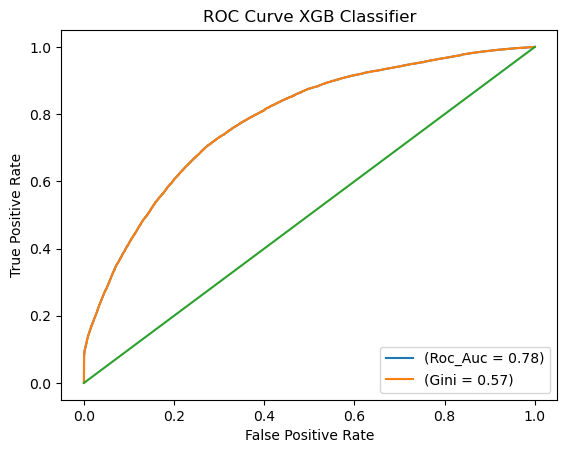

In [290]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = xgb_clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier')

plt.legend(loc='lower right')
plt.show()